In [1]:
import pandas as pd
import nltk
import numpy as np
import string
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter


stopwords = nltk.corpus.stopwords.words('german')
nlp = spacy.load('de_core_news_md',disable = ['parser','ner'])
nlp.max_length = 3000000
punctuation = string.punctuation+"’``''‘...--"


csv_file_path = "songs_with_topic.csv"
df = pd.read_csv(csv_file_path)

# Metadaten

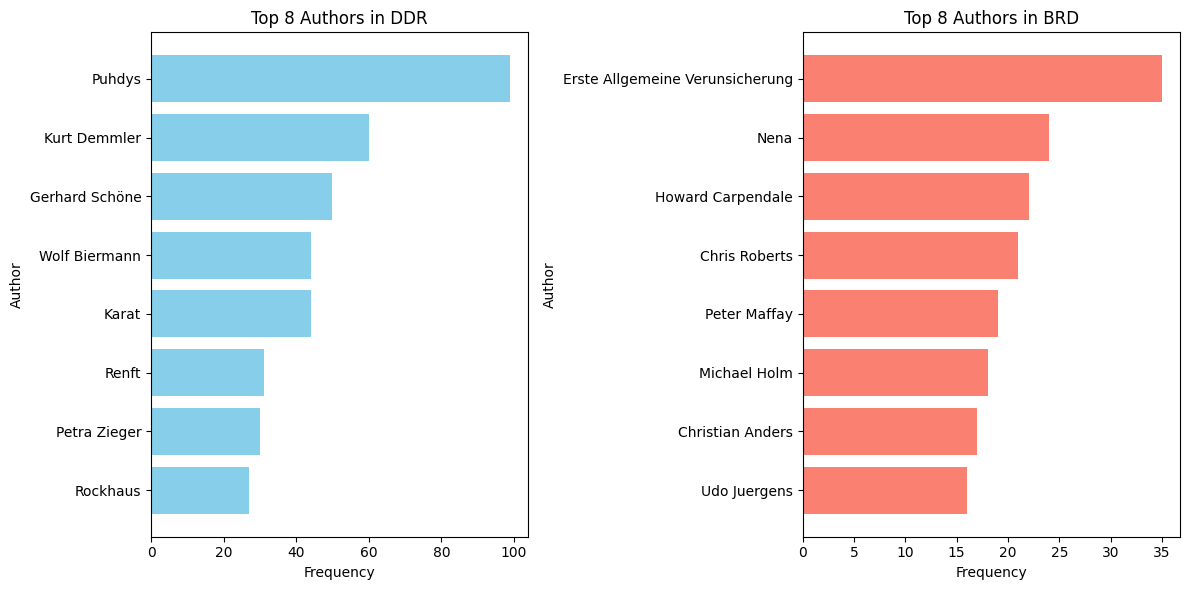

In [2]:
import matplotlib.pyplot as plt

ddr_df = df[df['Category'] == 'DDR']
brd_df = df[df['Category'] == 'BRD']

# Get the top 5 authors for each category
top_ddr_authors = ddr_df['Author'].value_counts().head(8)
top_brd_authors = brd_df['Author'].value_counts().head(8)

# Create a color map for the categories


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot top DDR authors in the first subplot
axes[0].barh(top_ddr_authors.index, top_ddr_authors.values, color='skyblue')
axes[0].set_title('Top 8 Authors in DDR')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Author')

# Plot top BRD authors in the second subplot
axes[1].barh(top_brd_authors.index, top_brd_authors.values, color='salmon')
axes[1].set_title('Top 8 Authors in BRD')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Author')

# Invert the y-axis for both subplots
axes[0].invert_yaxis()
axes[1].invert_yaxis()

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig("top_authors.jpg", dpi=300, bbox_inches='tight')
plt.show()

# Deskriptive Beschreibung

In [3]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’``\'\'‘...--'

In [4]:
ddr_texts = df[df["Category"]=="DDR"]
ddr_texts = [nltk.sent_tokenize(x) for x in ddr_texts["Text"]]
ddr_texts = " ".join(sum(ddr_texts,[]))

brd_texts = df[df["Category"]=="BRD"]
brd_texts = [nltk.sent_tokenize(x) for x in brd_texts["Text"]]
brd_texts = " ".join(sum(brd_texts,[]))

#compare = ""
"""
with open('news_1995.txt', 'r') as file:
    for line in file:
        index, sentence = line.strip().split('\t', 1)
        compare += sentence +" "
"""
songs = {"DDR": ddr_texts, "BRD": brd_texts}

In [5]:
unigrams={}
for k,v in songs.items():
    count = 0
    doc = nlp(v)
    words = [x.lemma_ if not x.is_punct else str(x) for x in doc]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in punctuation]
    words = [word for word in words if len(word)>1]
    count = len(words)
    words = [word for word in words if word not in stopwords]
    words = [word for word in words if not word.isdigit()]
    unigrams[k] = words
    print(f"{k} Tokens mit Stopwörtern: {count}")

DDR Tokens mit Stopwörtern: 174119
BRD Tokens mit Stopwörtern: 192260


# Anzahl der Tokens


In [6]:
print("DDR Tokens ohne Stopwörter: ", len(unigrams["DDR"]))
print("BRD Tokens ohne Stopwörter: ", len(unigrams["BRD"]))
#print("Vergleichskorpus Tokens ohne Stopwörter: ", len(unigrams["Compare"]))

DDR Tokens ohne Stopwörter:  82027
BRD Tokens ohne Stopwörter:  91783


# Most frequent words

In [40]:
def most_frequent(tokens,n):    
    word_freq = Counter(tokens)
    top_words = word_freq.most_common(n)
    table_data = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
    return table_data

In [41]:
BRD = most_frequent(unigrams["BRD"], 20)
DDR = most_frequent(unigrams["DDR"], 20)

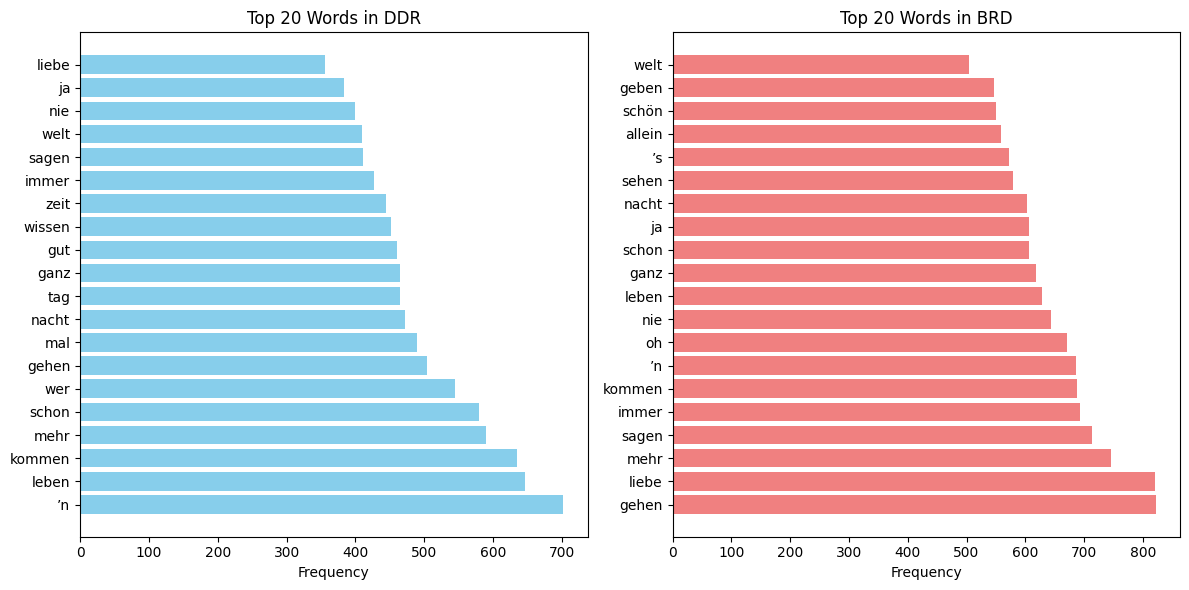

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import math

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot DDR data
axes[0].barh(DDR['Word'], DDR['Frequency'], color='skyblue')
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 Words in DDR')

# Plot FRG data
axes[1].barh(BRD['Word'], BRD['Frequency'], color='lightcoral')
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 20 Words in BRD')

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig("top_words.jpg", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


# Type/Token Ratio

In [7]:
def type_token(tokens):
    word_freq = Counter(tokens)
    return len(word_freq.keys())/len(tokens)

In [8]:
print("TTR for DDR: ", type_token(unigrams["DDR"]))
print("TTR for BRD: ", type_token(unigrams["BRD"]))

#ist recht niedrig weil in Songs viele Refrains vorkommen und sich Wörter wiederholen

TTR for DDR:  0.1347239323637339
TTR for BRD:  0.11857315624897857


# Most frequent bigrams

In [24]:
from nltk.util import ngrams

In [33]:
bigrams={}
for k,v in songs.items():
    words = word_tokenize(v.lower())
    words = [word for word in words if word not in punctuation and word not in stopwords]
    bi_grams = list(ngrams(words, 2))
    bigrams[k] = bi_grams

In [43]:
BRD = most_frequent(bigrams["BRD"], 20)
DDR = most_frequent(bigrams["DDR"], 20)

In [44]:
DDR['Word'] = DDR['Word'].apply(lambda x: f"{x[0]} {x[1]}")
BRD['Word'] = BRD['Word'].apply(lambda x: f"{x[0]} {x[1]}")

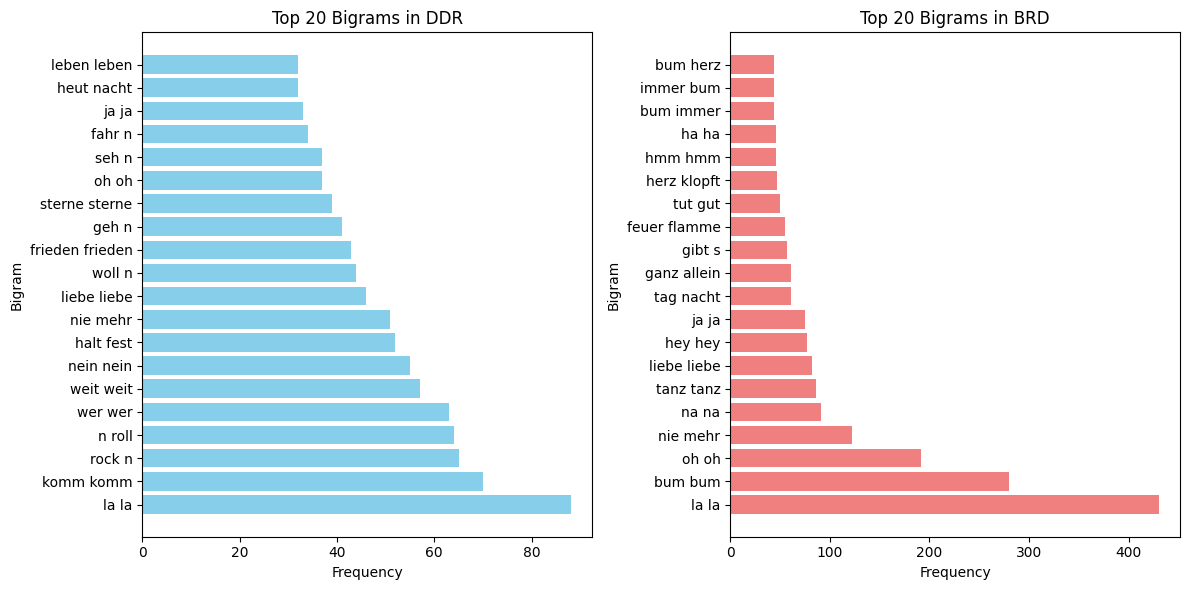

In [48]:
# Create subplots to display both dataframes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot DDR data
ax1.barh(DDR["Word"], DDR["Frequency"], color="skyblue")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Bigram")
ax1.set_title("Top 20 Bigrams in DDR")

# Plot FRG data
ax2.barh(BRD["Word"], BRD["Frequency"], color="lightcoral")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Bigram")
ax2.set_title("Top 20 Bigrams in BRD")

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.savefig("top_bigrams.jpg", dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

# LLR Keyness Analysis with a Compare Corpus

In [162]:
unigrams={}
for k,v in songs.items():
    allowed_postags=['NOUN']
    count = 0
    doc = nlp(v)
    words = [x.lemma_ if not x.is_punct else str(x) for x in doc]
    words = [x.lemma_ for x in doc if x.pos_ in allowed_postags]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in punctuation]
    words = [word for word in words if len(word)>2]
    count = len(words)
    words = [word for word in words if word not in stopwords]
    words = [word for word in words if not word.isdigit()]
    unigrams[k] = words
    print(f"{k} Tokens mit Stopwörtern: {count}")

DDR Tokens mit Stopwörtern: 30047
BRD Tokens mit Stopwörtern: 28596
Compare Tokens mit Stopwörtern: 38257


In [163]:
import nltk
from nltk import FreqDist
import math

# Calculate word frequencies
for k,v in list(unigrams.items())[:2]:
    
    comp_freq = FreqDist(unigrams["Compare"])
    target_freq = FreqDist(unigrams[k])

    # Calculate total word counts
    total_comp = len(unigrams["Compare"])
    total_target = len(unigrams[k])

    # Calculate log-likelihood ratio
    keyness_scores = {}
    for word in set(unigrams[k]):
        
        a = target_freq[word]
        if word in comp_freq:
            b = comp_freq[word]
        else:
            b = 0
        c = total_target
        d = total_comp
        
        E_1 = c*(a+b)/(c+d) + 1e-25
        E_2 = d*(a+b)/(c+d) + 1e-25
        if word == "liebe":
            print(a,b,c,d,E_1,E_2)
        
        LLR = 2 * ((a* math.log(a/E_1 + 1e-25)) + (b * math.log(b/E_2 + 1e-25)))
        keyness_scores[word] = LLR

    # Sort and rank words based on LLR
    sorted_keyness = sorted(keyness_scores.items(), key=lambda x: x[1], reverse=True)

    # Print the top 10 words with highest LLR
    print(f"Keynesss Scores for {k}")
    for word, score in sorted_keyness[:40]:
        print(f"{word} \t {score}")
    print("\n\n")
        

348 9 29768 38187 156.38549039805753 200.61450960194247
Keynesss Scores for DDR
nacht 	 600.2940742635931
liebe 	 500.8404948583806
traum 	 435.87080002869175
lied 	 377.30782729069745
welt 	 376.8727790217197
leben 	 312.6323251483785
tag 	 308.25923386617114
erde 	 264.1637696305394
wind 	 249.59463451226338
stein 	 221.47254614052179
zeit 	 220.53670881178536
herz 	 216.462536206722
mark 	 207.15362734749172
auge 	 206.2265238469129
sonne 	 200.02447302789545
haut 	 188.88911690719272
million 	 183.08857219241696
stern 	 178.09300371055593
hand 	 176.15195833263613
rock 	 171.9083777980035
eis 	 161.53997455952918
glück 	 159.1984464285373
himmel 	 149.3451589315859
gesicht 	 146.14077961368878
mädchen 	 138.38903565876905
sehnsucht 	 138.03996264682155
freund 	 131.66497243970292
meer 	 126.27580246725881
kind 	 125.54815396666257
wort 	 125.29314444043769
blut 	 122.3570909050978
haus 	 121.25940018460312
fieber 	 118.85928917227046
licht 	 118.80091007149119
morgen 	 118.76634952